In [5]:
import pyes
import pandas as pd
import elasticsearch
import os
import numpy as np
import time

es_address='192.168.1.112:9200'
conn = pyes.es.ES(es_address) #create
bq = pyes.query.BoolQuery() #結合很多時間範圍的query
#q = pyes.query.MatchAllQuery()

tq = pyes.query.TermQuery(field="text", value="cve") #找出想要的term出來
tq1 = pyes.query.TermQuery(field="text", value="vulnerability")
tq2 = pyes.query.TermQuery(field="text", value="exploit")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                   include_lower=True ,include_upper=True) #抓range
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_should(tq) #must = AND, 將tq rq抓進來, 將成立的條件加進來
bq.add_should(tq1)
bq.add_should(tq2)
bq.add_must(rq)

result = conn.search(query=bq , indices='twitter2' , doc_types='tweet') 


Twitters = []
Tweets = []
Url = []
Dates = []

#取有需要的資料
for i in result:
    Twitters.append(i['user']['name'])
    Tweets.append(i['text'])
    Url.append(i['entities']['urls'])
    Dates.append(int(time.strftime('%m', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))))

Twitter = np.unique(Twitters)

print 'Twitters :',len(Twitter) #Twitters
print 'Tweets :',len(result) #Tweets

Twitters : 83
Tweets : 1421


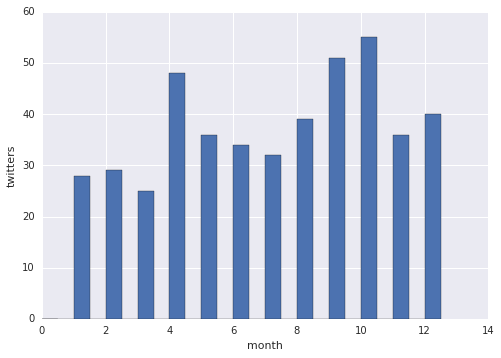

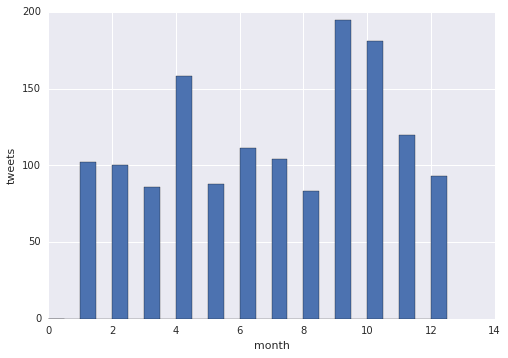

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Month_tweet = pd.DataFrame({'Tweet':pd.Series(Tweets), 'Month':pd.Series(Dates)}) #tweets and months

Month_twitter = pd.DataFrame({'Twitter':pd.Series(Twitters), 'Month':pd.Series(Dates)}) #twitters and months
Month_twitter = Month_twitter.drop_duplicates() #同月重複的twitter刪掉

ax = np.arange(0,13,0.5)
#twitters(12 month)
Month_twitter['Month'].hist(bins = ax)
plt.xlabel('month')
plt.ylabel('twitters')
plt.show()

#tweets(12 month)
Month_tweet['Month'].hist(bins = ax)
plt.xlabel('month')
plt.ylabel('tweets')
plt.show()

url : 1198  no_url : 223


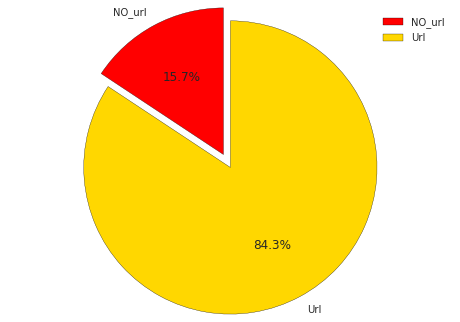

In [7]:
url = 0

#找有多少個有url
for url1 in Url:
    for url2 in url1:
        url += 1
        
no_url = len(Url) - url

print 'url :',url,' no_url :',no_url

#set parameters
sizes = [no_url, url]
colors = ['red','gold']
labels = 'NO_url','Url'
explode = (0.1,0)

plt.pie(sizes, colors = colors, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.axis('equal')
plt.legend()

plt.show()

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D object at 0x7f75fa64f710>, <matplotlib.lines.Line2D object at 0x7f75fa5eff90>, <matplotlib.lines.Line2D object at 0x7f75fa612bd0>, <matplotlib.lines.Line2D object at 0x7f75fa5b7810>, <matplotlib.lines.Line2D object at 0x7f75fa5da450>, <matplotlib.lines.Line2D object at 0x7f75fa5687d0>, <matplotlib.lines.Line2D object at 0x7f75fa792d10>, <matplotlib.lines.Line2D object at 0x7f75fa75cd10>, <matplotlib.lines.Line2D object at 0x7f75fa716410>, <matplotlib.lines.Line2D object at 0x7f75fa7c35d0>, <matplotlib.lines.Line2D object at 0x7f75fa83e310>, <matplotlib.lines.Line2D object at 0x7f75fa7cb210>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f75fa5ef950>, <matplotlib.lines.Line2D object at 0x7f75fa612590>, <matplotlib.lines.Line2D object at 0x7f75fa5b71d0>, <matplotlib.lines.Line2D object at 0x7f75fa5cfdd0>, <matplotlib.lines.Line2D object at 0x7f762c0d17d0>, <matplotlib.lines.Line2D object at 0x7f75fa792e50>, <matplotlib.lines.Line2D object at 0x7f75

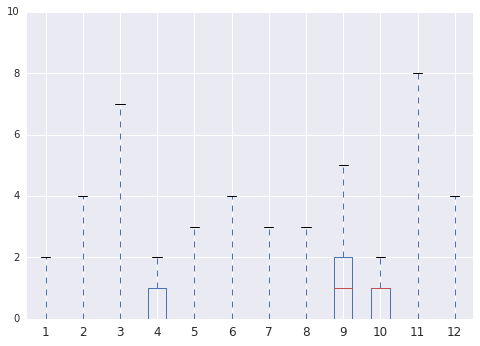

In [8]:
bq1 = pyes.query.BoolQuery()
bq1.add_should(tq)
bq1.add_must(rq)

result1 = conn.search(query=bq1 , indices='twitter2' , doc_types='tweet')

Twitters_cve = []
Dates_cve = []

for i in result1:
    Twitters_cve.append(i['user']['name'])
    Dates_cve.append(int(time.strftime('%m', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))))

CVE = pd.DataFrame({'Twitter_cve':pd.Series(Twitters_cve), 'Month_cve':pd.Series(Dates_cve)})
CVE = pd.crosstab(CVE['Twitter_cve'],CVE['Month_cve'])

print CVE.boxplot()

In [9]:
bq2 = pyes.query.BoolQuery()

tq = pyes.query.TermQuery(field="text", value="cve")
tq1 = pyes.query.TermQuery(field="text", value="vulnerability")
tq2 = pyes.query.TermQuery(field="text", value="exploit")
tq3 = pyes.query.TermQuery(field="text", value="vulnerable")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                   include_lower=True ,include_upper=True) 

rq = pyes.query.RangeQuery(qrange=ESR)

bq2.add_should(tq)
bq2.add_should(tq1)
bq2.add_should(tq2)
bq2.add_should(tq3)
bq2.add_must(rq)

result2 = conn.search(query=bq , indices='twitter2' , doc_types='tweet') 

Twitters2 = []
Tweets2 = []

#取有需要的資料
for i in result2:
    Twitters2.append(i['user']['name'])
    Tweets2.append(i['text'].lower())

In [13]:
Pre_decision = pd.DataFrame({'Twitter':pd.Series(Twitters2), 'Tweet':pd.Series(Tweets2)})

Twitter_unique = Pre_decision['Twitter'].unique()

cve = Pre_decision[Pre_decision['Tweet'].str.contains('cve')]
vulnerability = Pre_decision[Pre_decision['Tweet'].str.contains('vulnerability')]
exploit = Pre_decision[Pre_decision['Tweet'].str.contains('exploit')]
vulnerable = Pre_decision[Pre_decision['Tweet'].str.contains('vulnerable')]

decision = pd.DataFrame({'cve':cve['Twitter'].value_counts(),'vulnerability':vulnerability['Twitter'].value_counts(),
                   'exploit':exploit['Twitter'].value_counts(),'vulnerable':vulnerable['Twitter'].value_counts()}).fillna(0)
decision['total'] = decision['cve'] + decision['vulnerability'] + decision['exploit'] + decision['vulnerable']
class1 = []

#將各帳號分類４＄
for i in range(len(decision)):
    if (decision['cve'][i] > 0) & (decision['vulnerability'][i] > 0) & (decision['exploit'][i] > 0) & (decision['vulnerable'][i] > 0) & (decision['total'][i] > (decision['total'].mean()*3/2)):
        class1.append('lot')
    elif (decision['cve'][i] > 0) & (decision['vulnerability'][i] > 0) & (decision['exploit'][i] > 0) & (decision['vulnerable'][i] > 0) & ((decision['total'][i]) <= (decision['total'].mean()*3/2)) & ((decision['total'][i]) > (decision['total'].mean()*1/2)):
        class1.append('normal')
    else:
        class1.append('few')
print class1

['few', 'few', 'few', 'few', 'lot', 'few', 'few', 'few', 'few', 'normal', 'normal', 'few', 'few', 'lot', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'lot', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'normal', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'lot', 'lot', 'normal', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'lot', 'lot', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few', 'few']


In [23]:
from sklearn.cross_validation import train_test_split

all_inputs = decision[['cve','vulnerability','exploit','vulnerable']].values
all_classes = class1


(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.95238095238095233

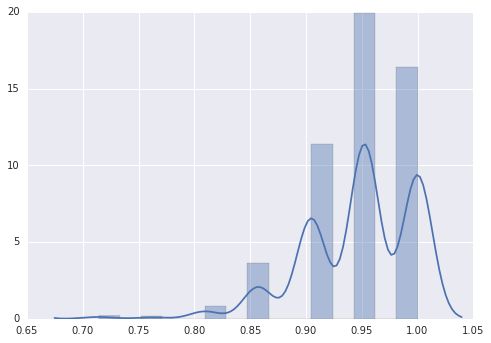

In [16]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


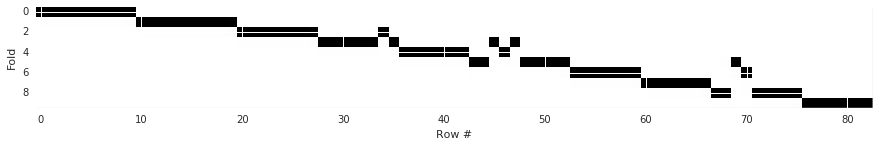

In [17]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

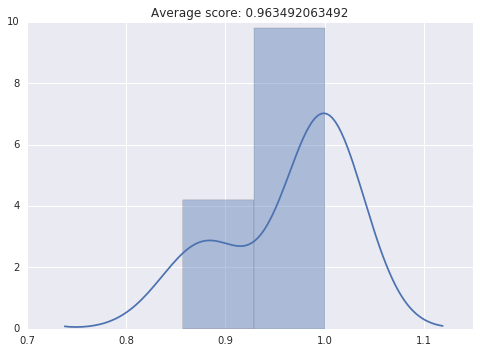

In [18]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

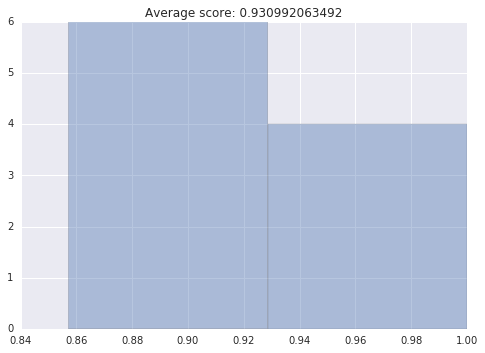

In [19]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [20]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/opt/conda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score: 0.975903614458
Best parameters: {'max_features': 4, 'max_depth': 3}


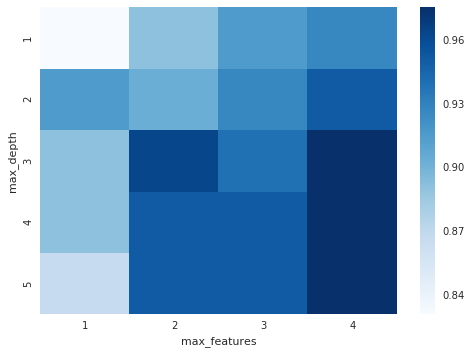

In [21]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')